# Brief Book Business
## Mulot Brice

Importation des librairies :

In [588]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotnine as p9
from matplotlib import pyplot as plt

Importation des jeux de données :

In [530]:
clients = pd.read_csv("clients.csv")
produits = pd.read_csv("produits.csv")
ventes = pd.read_csv("ventes.csv")

In [531]:
clients.head()

client_id sex  birth
0    c_4410   f   1967
1    c_7839   f   1975
2    c_1699   f   1984
3    c_5961   f   1962
4    c_5320   m   1943

In [532]:
produits.head()

id_prod  price  categ
0  0_1421  19.99      0
1  0_1368   5.13      0
2   0_731  17.99      0
3   1_587   4.99      1
4  0_1507   3.99      0

In [533]:
ventes.head()

id_prod                        date session_id client_id
0  0_1483  2021-04-10 18:37:28.723910    s_18746    c_4450
1   2_226  2022-02-03 01:55:53.276402   s_159142     c_277
2   1_374  2021-09-23 15:13:46.938559    s_94290    c_4270
3  0_2186  2021-10-17 03:27:18.783634   s_105936    c_4597
4  0_1351  2021-07-17 20:34:25.800563    s_63642    c_1242

## 1. Trie des données, traitement des valeurs aberrantes et manquantes.

### 1.1. On regarde si il y a des valeurs manquantes :

In [534]:
clients.info()
clients.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


client_id    0
sex          0
birth        0
dtype: int64

In [535]:
produits.info()
produits.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


id_prod    0
price      0
categ      0
dtype: int64

In [536]:
ventes.info()
ventes.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337016 entries, 0 to 337015
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     337016 non-null  object
 1   date        337016 non-null  object
 2   session_id  337016 non-null  object
 3   client_id   337016 non-null  object
dtypes: object(4)
memory usage: 10.3+ MB


id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

On voit donc qu'il n'y a aucune valeure manquante dans nos 3 dataframes.

### 1.2. Suppression des doublons

On voit grâce à la fonction info qu'il n'y a aucune valeure null de présentes dans les 3 dataframes, donc aucune valeure manquante

In [537]:
clients = pd.read_csv("clients.csv")

avant = len(clients)
print("Taille de la dataframe avant suppression des doublons :",avant)

clients = clients.drop_duplicates()

apres = len(clients)
print("Taille de la dataframe après suppresion des doublons :",apres)
print("Il y a donc eu", avant - apres, "doublon(s)")

Taille de la dataframe avant suppression des doublons : 8623
Taille de la dataframe après suppresion des doublons : 8623
Il y a donc eu 0 doublon(s)


In [538]:
produits = pd.read_csv("produits.csv")

avant = len(produits)
print("Taille de la dataframe avant suppression des doublons :",avant)

produits = produits.drop_duplicates()

apres = len(produits)
print("Taille de la dataframe après suppresion des doublons :",apres)
print("Il y a donc eu", avant - apres, "doublon(s)")

Taille de la dataframe avant suppression des doublons : 3287
Taille de la dataframe après suppresion des doublons : 3287
Il y a donc eu 0 doublon(s)


In [539]:
ventes = pd.read_csv("ventes.csv")

avant = len(ventes)
print("Taille de la dataframe avant suppression des doublons :",avant)

ventes.drop_duplicates(inplace = True)

apres = len(ventes)
print("Taille de la dataframe après suppresion des doublons :",apres)
print("Il y a donc eu", avant - apres, "doublon(s)")
df = pd.merge(ventes, produits)
df = pd.merge(df, clients)

Taille de la dataframe avant suppression des doublons : 337016
Taille de la dataframe après suppresion des doublons : 336890
Il y a donc eu 126 doublon(s)


### 1.3. Les outliers ou valeures abérrantes

4569    1929
2491    1929
418     1929
1086    1930
5138    1930
        ... 
7949    2004
1130    2004
5433    2004
5642    2004
7530    2004
Name: birth, Length: 8623, dtype: int64

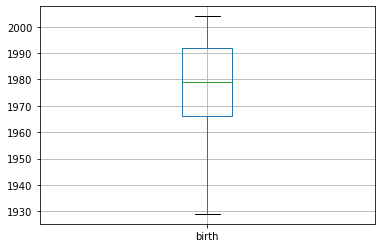

In [540]:
clients[["birth"]].boxplot()
clients.birth.sort_values()

Il ne semble pas y avoir de valeure abérrante 

Pour la colonne des sex on va plutôt vérifier que l'on ai bien uniquement des hommes et des femmes donc "f" et "m" grâce à la fonction unique.

In [541]:
clients.sex.unique()

array(['f', 'm'], dtype=object)

731      -1.00
2355      0.62
2272      0.62
370       0.66
1211      0.77
         ...  
2779    233.54
1436    236.99
394     247.22
724     254.44
947     300.00
Name: price, Length: 3287, dtype: float64

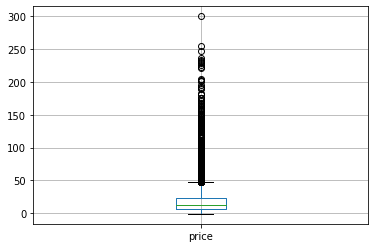

In [542]:
produits[["price"]].boxplot()
produits.price.sort_values()

Il semble que le prix d'un produit ne peux pas être négative il va donc falloir corriger cela. De plus nous voyons beaucoup de valeurs superieur à notre boxplot, nous allons donc devoir les regarder et voir si leur prix est normal ou non.
Etant donnée que nous somme dans une librairie il semble étrange qu'un livre coûte plus de 50 euros.

In [543]:
print(produits[produits.categ == 2].sort_values(by = "price"))
print(produits[produits.categ == 1].sort_values(by = "price"))
print(produits[produits.categ == 0].sort_values(by = "price"))

     id_prod   price  categ
3099    2_33   30.99      2
390     2_45   32.99      2
3095    2_67   32.99      2
770    2_107   33.99      2
1717   2_152   34.23      2
...      ...     ...    ...
2779    2_30  233.54      2
1436   2_167  236.99      2
394    2_158  247.22      2
724     2_76  254.44      2
947      2_2  300.00      2

[239 rows x 3 columns]
     id_prod  price  categ
3243   1_238   2.00      1
2853   1_332   2.24      1
2496    1_36   2.64      1
2366    1_58   2.95      1
1278   1_473   2.99      1
...      ...    ...    ...
2962   1_608  72.75      1
2827   1_171  73.99      1
808     1_10  78.83      1
879    1_679  79.99      1
824     1_13  80.99      1

[739 rows x 3 columns]
     id_prod  price  categ
731      T_0  -1.00      0
2272   0_528   0.62      0
2355   0_202   0.62      0
370    0_120   0.66      0
1211  0_1844   0.77      0
...      ...    ...    ...
569    0_197  37.99      0
2663  0_1581  37.99      0
1360   0_494  39.58      0
2809  0_2147  39.99   

Les valeurs des prix ont l'air de correspondres avec leur catégorie donc nous allons les laissé.

<AxesSubplot:>

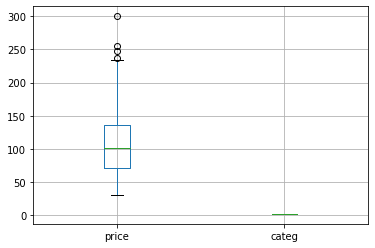

In [544]:
produits[produits.categ == 2].sort_values(by = "price").boxplot()

<AxesSubplot:>

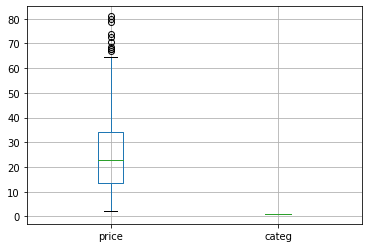

In [545]:
produits[produits.categ == 1].sort_values(by = "price").boxplot()


<AxesSubplot:>

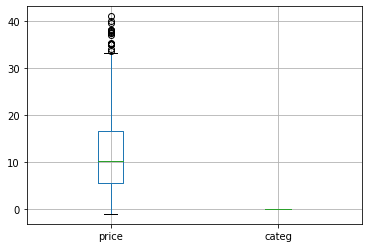

In [546]:
produits[produits.categ == 0].sort_values(by = "price").boxplot()

<AxesSubplot:>

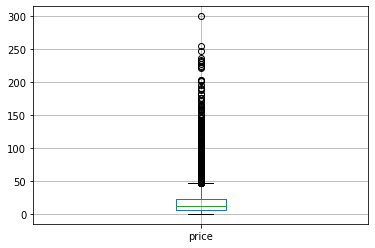

In [547]:
false_observation = produits.price.argmin()
produits = produits.drop(false_observation).reset_index(drop=True)
produits[["price"]].boxplot()

<AxesSubplot:>

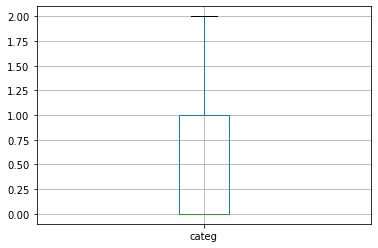

In [548]:
produits[["categ"]].boxplot()

In [549]:
produits.categ.value_counts()

0    2308
1     739
2     239
Name: categ, dtype: int64

In [550]:
ventes[["date"]].sort_values(by="date")

date
176588       2021-03-01 00:01:07.843138
95285        2021-03-01 00:02:26.047414
216737       2021-03-01 00:02:38.311413
180767       2021-03-01 00:04:54.559692
293481       2021-03-01 00:05:18.801198
...                                 ...
26814   test_2021-03-01 02:30:02.237447
317345  test_2021-03-01 02:30:02.237448
203239  test_2021-03-01 02:30:02.237449
245346  test_2021-03-01 02:30:02.237449
38779   test_2021-03-01 02:30:02.237450

[336890 rows x 1 columns]

On voit que l'on possède des dates qui contiennent "test_" devant leur année il va donc falloir les regardé, on ce rend compte que l'id associé est celle correspondant à un prix de -1 donc on peut fusionner nos dataframes et ces données seront supprimé.

Avant de merge les tables on vérifie que les id des tables soit bien des clés primaires.

In [551]:
def testerCle(df, colonnes):
    """Fonction qui prend en arguments un dataframe et les colonnes qui composent la clé primaire à tester."""

    # On compare la taille du dataframe avant et après dédoublonnage 
    if df.size == df.drop_duplicates(colonnes).size :
        print("La clé n'est pas présente plusieurs fois dans le dataframe.")
        print("Elle peut donc être utilisée comme clé primaire.".format(colonnes))
    else :
        print("La clé est présente plusieurs fois dans le dataframe.")
        print("Elle ne peut donc pas être utilisée comme clé primaire.".format(colonnes))
    
    # On renvoie également le comptage
    print("Le dataframe est de la forme : " + str(df.shape) + " (lignes, colonnes) \n")

testerCle(clients, "client_id")
testerCle(produits, "id_prod")

La clé n'est pas présente plusieurs fois dans le dataframe.
Elle peut donc être utilisée comme clé primaire.
Le dataframe est de la forme : (8623, 3) (lignes, colonnes) 

La clé n'est pas présente plusieurs fois dans le dataframe.
Elle peut donc être utilisée comme clé primaire.
Le dataframe est de la forme : (3286, 3) (lignes, colonnes) 



In [552]:
ventes.session_id.value_counts().head()

s_0         74
s_118668    14
s_96857     13
s_21005     13
s_168560    12
Name: session_id, dtype: int64

s_0 correspond donc au produit valant -1 donc sera supprimé lors du merge tant dis que les autres sont simplement les mêmes utilisateurs qui vont achetés plusieurs livres en même temps.

In [553]:
df = pd.merge(ventes, produits, on = "id_prod")
df = pd.merge(df, clients, on= "client_id")

In [554]:
df.date.sort_values()

272025    2021-03-01 00:01:07.843138
217451    2021-03-01 00:02:26.047414
153736    2021-03-01 00:02:38.311413
174376    2021-03-01 00:04:54.559692
284426    2021-03-01 00:05:18.801198
                     ...            
132992    2022-02-28 23:56:57.196281
157259    2022-02-28 23:56:57.561424
141368    2022-02-28 23:57:12.741573
157254    2022-02-28 23:59:02.381670
157291    2022-02-28 23:59:58.040472
Name: date, Length: 336713, dtype: object

On voit que l'on a plus de problème avec des "test_" donc notre base de donnée est maintenant propre

In [555]:
df.sort_values(by="date")

id_prod                        date session_id client_id  price  categ  \
272025  0_1259  2021-03-01 00:01:07.843138        s_1     c_329  11.99      0   
217451  0_1390  2021-03-01 00:02:26.047414        s_2     c_664  19.37      0   
153736  0_1352  2021-03-01 00:02:38.311413        s_3     c_580   4.50      0   
174376  0_1458  2021-03-01 00:04:54.559692        s_4    c_7912   6.55      0   
284426  0_1358  2021-03-01 00:05:18.801198        s_5    c_2033  16.49      0   
...        ...                         ...        ...       ...    ...    ...   
132992   1_456  2022-02-28 23:56:57.196281   s_172422    c_5787  28.27      1   
157259   1_370  2022-02-28 23:56:57.561424   s_172423    c_1460  13.11      1   
141368  0_1538  2022-02-28 23:57:12.741573   s_172424    c_1876   8.61      0   
157254  0_1403  2022-02-28 23:59:02.381670   s_172423    c_1460  15.99      0   
157291  0_1775  2022-02-28 23:59:58.040472   s_172423    c_1460   6.99      0   

       sex  birth  
272025   f   1967  
217451   m   1960  
153736   m   1988  
174376   f   1989  
284426   f   1956  
...     ..    ...  
132992   f   1986  
157259   m   1989  
141368   m   1983  
157254   m   1989  
157291   m   1989  

[336713 rows x 8 columns]

## 2. Analyse des données

### 2.1. Calcul des indicateurs de tendance centrale et de dispersion

On va commencé par trouver les âges auquel les clients ont commandé sur le site afin de pouvoir les étudier.

In [556]:
annees = []
month = []
day = []
for i in range(len(df)):
    annees.append(int(df.date[i][0:4]))
    month.append(int(df.date[i][5:7]))
    day.append(int(df.date[i][8:10]))
df = df.assign(year = annees, month = month, day = day)

In [557]:
df

id_prod                        date session_id client_id  price  categ  \
0       0_1483  2021-04-10 18:37:28.723910    s_18746    c_4450   4.99      0   
1       0_1085  2021-09-29 11:14:59.793823    s_97382    c_4450   3.99      0   
2       0_1453  2021-08-27 19:50:46.796939    s_81509    c_4450   7.99      0   
3       0_1405  2021-08-27 20:07:25.878440    s_81509    c_4450   4.99      0   
4       0_1392  2021-12-28 11:45:04.072281   s_141302    c_4450   6.30      0   
...        ...                         ...        ...       ...    ...    ...   
336708   1_607  2021-09-25 07:26:00.224331    s_95185    c_4786  26.99      1   
336709   1_673  2021-06-01 00:49:49.781631    s_42350    c_2793  12.99      1   
336710  0_2075  2021-10-09 09:03:48.268536   s_102200    c_2793   8.99      0   
336711  0_1692  2021-09-15 19:42:08.596375    s_90430    c_4478  13.36      0   
336712   0_142  2021-09-25 18:07:25.880052    s_95415    c_1232  19.85      0   

       sex  birth  year  month  day  
0        f   1977  2021      4   10  
1        f   1977  2021      9   29  
2        f   1977  2021      8   27  
3        f   1977  2021      8   27  
4        f   1977  2021     12   28  
...     ..    ...   ...    ...  ...  
336708   f   1967  2021      9   25  
336709   m   1933  2021      6    1  
336710   m   1933  2021     10    9  
336711   f   1970  2021      9   15  
336712   f   1960  2021      9   25  

[336713 rows x 11 columns]

In [558]:
age = annee - df.birth
df = df.assign(age = age)

Ensuite on calcule la médianne, la moyenne, la variance et l'écart-type des prix et des âges.

In [559]:
age_median = np.median(df.age)
age_mean = df.age.mean()
age_var = np.var(df.age)
age_sd = np.std(df.age)
print("On a un âge median de",age_median)
print("Un âge moyen de", age_moyenne)
print("Une variance de", age_var)
print("Et enfin un écart-type de", age_sd)

On a un âge median de 41.0
Un âge moyen de 43.176432154386674
Une variance de 182.90975309840533
Et enfin un écart-type de 13.524413225659934


In [560]:
price_median = np.median(df.price)
price_mean = df.price.mean()
price_var = np.var(df.price)
price_sd = np.std(df.price)
print("On a un prix median de", price_median)
print("Un prix moyen de", price_mean)
print("Une variance de", price_var)
print("Et enfin un écart-type de", price_sd)

On a un prix median de 13.9
Un prix moyen de 17.215188513728638
Une variance de 318.81598278374
Et enfin un écart-type de 17.855418863295814


### 2.2. Analyse de concentration

#### 2.2.1 Calcule de l'indice de Gini :

In [561]:
def gini(liste):
    count = len(liste)
    coefficient = 2 / count
    indexes = range(1, count + 1)
    weighted_sum = (indexes * liste).sum()
    total = liste.sum()
    constant = (count + 1) / count
    return coefficient * weighted_sum / total - constant

In [562]:
def lorenz_curve(X):
    X_lorenz = X.cumsum() / X.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0) 
    X_lorenz[0], X_lorenz[-1]
    fig, ax = plt.subplots(figsize=[6,6])
    ## scatter plot of Lorenz curve
    ax.scatter(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz, 
               marker='.', color='darkgreen', s=100)
    ## line plot of equality
    ax.plot([0,1], [0,1], color='k')


0.07794055517507315


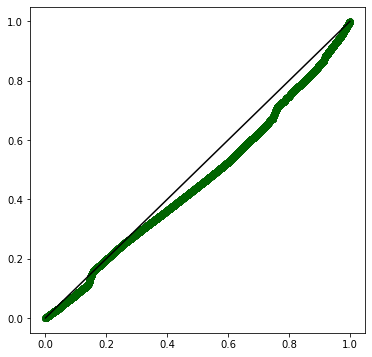

In [563]:
print(gini(df.price))
price = np.array(df.price)
lorenz_curve(price)

0.007825501222353815


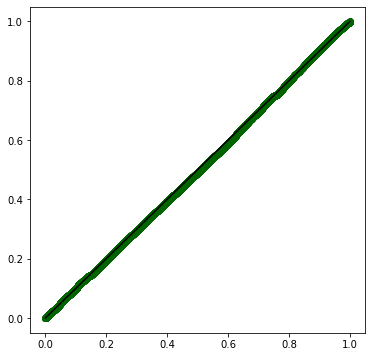

In [564]:
print(gini(df.age))
age = np.array(df.age)
lorenz_curve(age)

#### 2.2.2. Histogramme

<AxesSubplot:xlabel='age', ylabel='Count'>

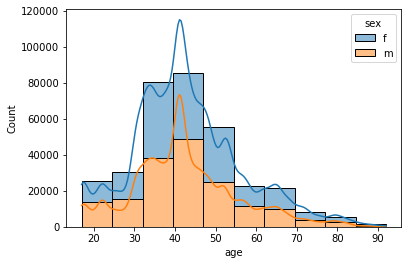

In [565]:
sns.histplot(df[['sex',"age"]], x = df.age, bins = 10, kde = True, hue = "sex", multiple = "stack")

In [566]:
df = df.assign(categ_age = pd.cut(df.age,[16,20,30,40,50,65,92]))

<AxesSubplot:xlabel='price', ylabel='Count'>

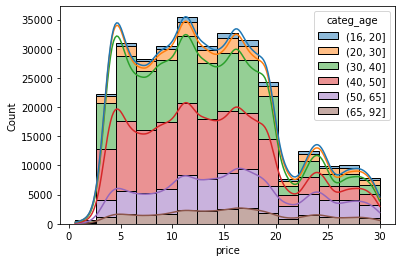

In [567]:
sns.histplot(df[['categ_age',"price"]], x = df.price[df.price <= 30], bins = 15, kde = True, hue = df.categ_age, multiple = "stack")

In [568]:
df.categ_age.value_counts() / len(df.categ_age) * 100

(40, 50]    31.696727
(30, 40]    29.268546
(50, 65]    17.830318
(20, 30]     9.984170
(65, 92]     7.126247
(16, 20]     4.093991
Name: categ_age, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

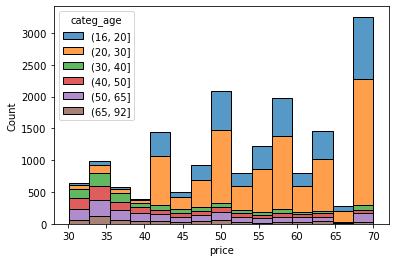

In [569]:
sns.histplot(df[['categ_age',"price"]], x = df.price[(df.price > 30) & (df.price <= 70)], bins = 15, hue = df.categ_age, multiple = "stack")

<AxesSubplot:xlabel='price', ylabel='Count'>

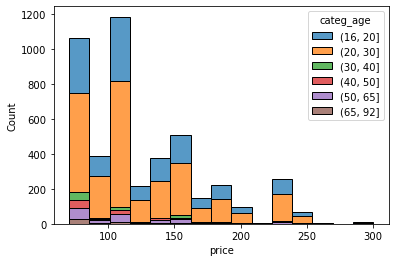

In [570]:
sns.histplot(df[['categ_age',"price"]], x = df.price[df.price > 70], bins = 15, hue = df.categ_age, multiple = "stack")

<AxesSubplot:xlabel='price', ylabel='categ_age'>

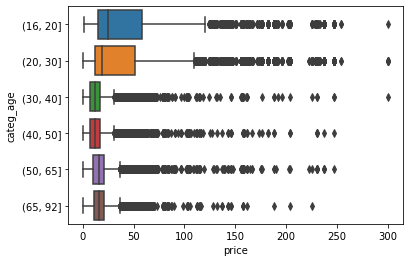

In [571]:
sns.boxplot(data = df, x = df.price, y = df.categ_age)

On voit donc qu'il y a une plus forte corrélation sur les livres qui coûtent le plus cher pour les clients de moins de 30 ans que pour les plus de 30 ans.

#### 2.2.3. Représentation de série temporelle

In [617]:
year_price = pd.DataFrame(df[["price", "year"]].groupby(['year']).sum())
year_price.reset_index(inplace = True)
year_price

year       price
0  2021  4740881.58
1  2022  1055696.19

([<matplotlib.patches.Wedge at 0x12965ad7b80>,
 [Text(-1.092953663767998, 0.7038837182774655, '2021'),
  Text(0.9248068905016977, -0.595594002052221, '2022')])

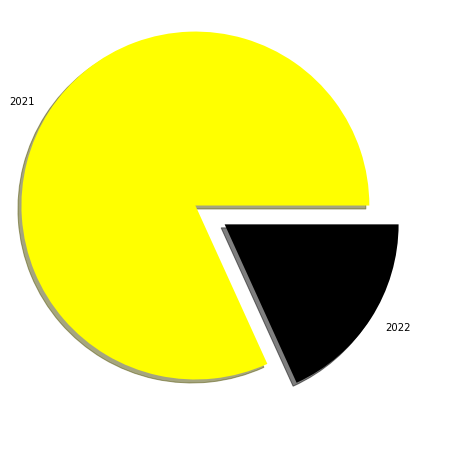

In [618]:
plt.figure(figsize = (8, 8))
plt.pie(test.price, labels = test.year,colors=["yellow","black"], explode = [0.2, 0], shadow=True)

In [619]:
date_price = pd.DataFrame(df[["price", "year", "month"]].groupby(['year', "month"]).sum())
date_price.reset_index(inplace = True)
date_price

year  month      price
0   2021      3  479312.03
1   2021      4  472980.72
2   2021      5  489367.95
3   2021      6  481257.94
4   2021      7  480898.66
5   2021      8  479305.19
6   2021      9  502771.28
7   2021     10  319159.96
8   2021     11  512890.17
9   2021     12  522937.68
10  2022      1  522955.31
11  2022      2  532740.88

In [621]:
year_month = ["Mar 2021", "Avr 2021", "May 2021", "Jun 2021", "Jul 2021", "Aug 2021", "Sep 2021", "Oct 2021", "Nov 2021", "Dec 2021", "Jan 2022", "Feb 202"]
date_price = date_price.assign(year_month = year_month)

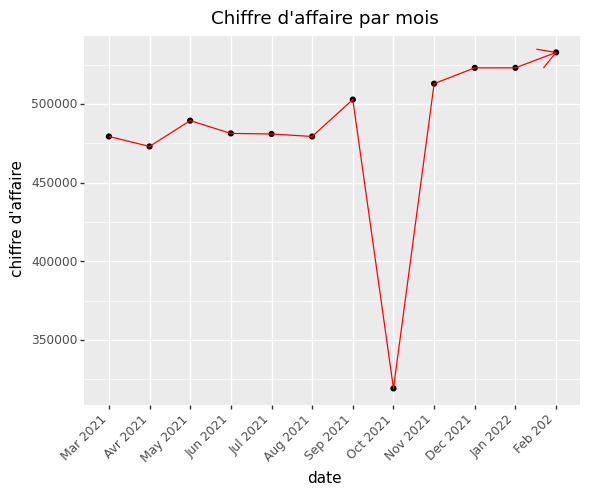

<ggplot: (79832552048)>

In [627]:
(
    p9.ggplot(data = date_price, mapping = p9.aes(x = "year_month", y = "price", group=1))
    + p9.theme(axis_text_x = p9.element_text(angle=45, hjust=1))
    + p9.geom_point()
    + p9.geom_line(arrow = p9.arrow(), color = "red")
    + p9.xlim("Mar 2021", "Avr 2021", "May 2021", "Jun 2021", "Jul 2021", "Aug 2021", "Sep 2021", "Oct 2021", "Nov 2021", "Dec 2021", "Jan 2022", "Feb 202")
    + p9.ggtitle("Chiffre d'affaire par mois")
    + p9.labs(x='date', y="chiffre d'affaire")
)

On voit un chiffre d'affaire globalement en hausse au fur et à mesur des mois, avec un pic négatif en octobre 2021 ou nous perdons 15 000 euros de bénéfice par rapport au mois de Septembre 2021.

#### 2.2.4. Analyse bivarié

In [634]:
corr = df.corr()
corr_df = corr.unstack().reset_index()
corr_df.columns = ["feature_1", "feature_2", "correlation"]
corr_df.sort_values(by = "correlation", ascending = False, inplace = True)
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']]
corr_df.head()

feature_1 feature_2  correlation
7      categ     price     0.673359
1      price     categ     0.673359
2      price     birth     0.211529
14     birth     price     0.211529
9      categ     birth     0.098612

In [655]:
distrib = df.categ.value_counts() * 100 / len(df)

In [656]:
price_categ = df[["categ","price"]].groupby(["categ"]).sum()
price_categ.reset_index(inplace = True)
price_categ

categ       price
0      0  2229722.65
1      1  2247384.41
2      2  1319470.71

In [657]:
distrib_ca = price_categ.price * 100 / sum(price_categ.price) 
price_categ.assign(distrib = distrib, ca_percent = distrib_ca)

categ       price    distrib  ca_percent
0      0  2229722.65  62.197183   38.466191
1      1  2247384.41  32.590069   38.770883
2      2  1319470.71   5.212748   22.762926

On peut se rendre que les catégories des livres ont une forte corrélation avec le prix des livres. Partant donc du principe que 0 = livre pas cher, 1 = livre normal et 2 = livre cher. 

On se rend compte logiquement par la suite que 62.2% des livres vendues sont des livres de catégorie 0, et que sur le chiffres d'affaire total (de Mars 2021 à Février 2022), il représente 38.4%. La catéorie 1 représente 35.6% des livres vendues et 38.8% du chiffre d'affaire. Et enfin les livres de catégorie ne représente que 5.2% des livres vendues et pourtant compte comme 22.8% du chiffre d'affaire.

On va pouvoir continuer d'affirmer notre hypothèse sur la corrélation entre categ et price puisque les livres de catégories 2 représente presque 1/4 du chiffre d'affaire pour seulement 5% des ventes.

In [714]:
data = df[["categ_age","price","categ"]].groupby(["categ_age","categ"]).sum()
distrib = pd.DataFrame(df[["categ_age", "categ"]].value_counts() *100 / len(df))
distrib_ca = data.price * 100 / sum(data.price)
data = data.assign(distrib=distrib, ca_percent = distrib_ca)
data.reset_index(inplace=True)
data

categ_age  categ      price    distrib  ca_percent
0   (16, 20]      0   33373.34   0.924823    0.575742
1   (16, 20]      1  105847.90   1.525929    1.826041
2   (16, 20]      2  419419.63   1.643239    7.235642
3   (20, 30]      0  125978.16   3.512784    2.173320
4   (20, 30]      1  228353.32   3.312613    3.939451
5   (20, 30]      2  796439.38   3.158773   13.739820
6   (30, 40]      0  806743.91  22.474630   13.917590
7   (30, 40]      1  460919.62   6.705117    7.951582
8   (30, 40]      2   22678.17   0.088800    0.391234
9   (40, 50]      0  859700.24  24.032930   14.831169
10  (40, 50]      1  522896.33   7.580640    9.020777
11  (40, 50]      2   21897.65   0.083157    0.377769
12  (50, 65]      0  290283.49   8.095322    5.007843
13  (50, 65]      1  659728.45   9.554725   11.381344
14  (50, 65]      2   45366.10   0.180272    0.782636
15  (65, 92]      0  113643.51   3.156694    1.960528
16  (65, 92]      1  269638.79   3.911046    4.651689
17  (65, 92]      2   13669.78   0.058507    0.235825

Dans le même principe que précedemment on voit que les jeunes bien qu'ils soient peut (-30 ans) dépensent plus que qu'une personne de plus de + de 30 ans. 

Comme nous avons pu voir dans la partie 2.2.2., cela est dû aufait qu'ils sont les acheteurs des livres les plus chers et non pas qu'ils achètent uniquement les livres les plus chers. Car comme on peut le voir le nombre de livre acheté est semblable pour chaque catégorie. Cependant comme les livres de catégorie 2 coute cher ils vont donc automatiquement faire augmenter leurs dépenses. De plus on a vu que les livres de catégories 2 vendues représentes 5.2% des ventes hors, les - 30ans représentent du coup 92% des ventes de livres de catégories 2. 

On peut donc conclure qu'il y a bien une corrélation entre prix et âge (-30 ans).